# Artificial Neural Network (ANN) from Scratch using Python
## Joel Raymond Day

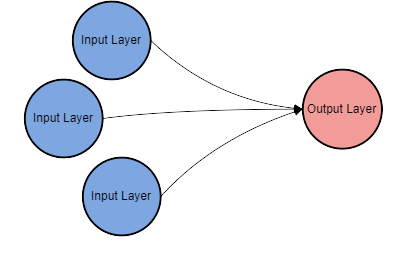

In [1]:
import numpy as np # for math
import pandas as pd # for data storage
import random # for weight and bias generation
import time # to record training time
import matplotlib.pyplot as plt # visuals

# Load and Scale Data

In [2]:
# independent variables (requires scaling)
age = np.array([60, 63, 17, 35, 90, 10])
exercise = np.array([8, 2, 7, 4, 1, 9])
diet = np.array([7, 2, 7, 5, 1, 7])

# min-max scaling for independent features
x1 = (age - 0) / (101 - 0)
x2 = (exercise - 0) / (11 - 0)
x3 = (diet - 0) / (11 - 0)

In [3]:
# dependent variable (does not need to be scaled)
y = np.array([7, 3, 9, 6, 1, 10])

# Initiate Neural Network Parameters
## (1) Weights and Bias

Z.png

In [5]:
# generate a random number uniformly between lower and upper bound
lower_bound = .1
upper_bound = .9

# initiate random weights
w1 = random.uniform(lower_bound, upper_bound)
w2 = random.uniform(lower_bound, upper_bound)
w3 = random.uniform(lower_bound, upper_bound)

# initiate bias - can be set to zero (unlike weights)
b = 0

# learning rate
lr = 0.005

# epochs
iterations = 25000

## (2) Activation Function and its Derivitive
## Activation Functions Neural Networks: A Quick & Complete Guide [link text](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/)

identity.png

In [ ]:
# Activation function : identity function
def activ_func(x):
    return x # identity

# Derivative of the identity activation function wrt sum of inputs and weights equation (L)
def d_activ_func(x):
    return 1

## (3) Forward propagation

y_hat.png

## (4) Loss Function and its Derivitive
## Mean Squared Error loss function and its gradient (derivative) for a batch of inputs [link text](https://www.bragitoff.com/2021/12/mean-squared-error-loss-function-and-its-gradient-derivative-for-a-batch-of-inputs-python-code/#google_vignette)

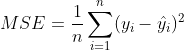

In [ ]:
# n = number of samples (also equal to the length of the input vectors)
n = len(age)

In [12]:
# Mean Suared Error (MSE)
def MSE(predictions, targets):
    return ((1/n)*np.sum(((predictions-targets)**2)))
    # ALT METHOD: divide by 2 to make the derivitive simpler. return ((1/2n)*np.sum((predictions-targets)**2))
    # ALT METHOD: derivitive would be...       ((1/n)*(predictions - targets))

# Derivitve of Mean Suared Error wrt to the activation equation (Y_pred)
def d_MSE(predictions, targets):
    return ((1/n)*2*(predictions - targets))

## (5) Backward Propagation
## Gradient Equation [link text](https://sebastianraschka.com/faq/docs/mse-derivative.html)

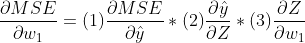

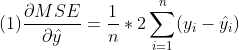

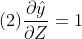

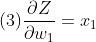

In [ ]:
def single_parameter_back_propagation(predictions, targets, Z, parameter):
  # calculate the gradient for each parameter by multipling each partial derivitve (chain rule)

  # (1)
  alpha = d_MSE(predictions, targets)

  # (2)
  beta = d_activ_func(Z)

  # (3)
  if parameter == 'w1':
    theta = x1
  elif parameter == 'w2':
    theta = x2
  elif parameter == 'w3':
    theta = x3
  # bias is 1 (not = bias) because it is not multiplied by an input variable
  elif parameter == 'b':
    theta = 1
  else:
    print('invalid parameter')

  # calculate gradient
  # returns a vector of gradients the size of input vector
  # gradient sizes may be able to distinguish feature importance (or at least find the feature that has the potential to improve the model the most)
  gradient = alpha * beta * theta

  # divide by n again to get the average loss per sample
  # returns the mean gradient for the vector of gradients
  avg_gradient = np.mean(gradient)

  return avg_gradient

# Train Neural Network

In [ ]:
def single_layer_model(x1, x2, x3, w1, w2, w3, b):
    Z = w1*x1 + w2*x2 + w3*x3 + b
    Y_pred = activ_func(Z)
    return Y_pred, Z

In [ ]:
start_time = time.time()
data_storage = pd.DataFrame(columns=['Z', 'y_pred', 'RMSE', 'w1_gradient', 'w2_gradient', 'w3_gradient', 'b_gradient', 'w1', 'w2', 'w3', 'b'])
for i in range(iterations):

    # Forward propagation
    Y_pred, Z = single_layer_model(x1, x2, x3, w1, w2, w3, b)

    # calculate prediction error
    loss = MSE(Y_pred, y)
    RMSE = np.sqrt(loss)

    # Backward propagation
    # calculate the gradient for each parameter
    w1_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'w1')
    w2_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'w2')
    w3_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'w3')
    b_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'b')

    # update weights and bias
    # the gradient vector points in the direction that will reduce error the most.
    # this value is negitive so you must subtract the gradient from the weight so the negitives cancel.
    w1 -= lr * w1_gradient
    w2 -= lr * w2_gradient
    w3 -= lr * w3_gradient
    b -= lr * b_gradient

    # store values in df
    data_storage.loc[i] = [Z, Y_pred, RMSE, w1_gradient, w2_gradient, w3_gradient, b_gradient, w1, w2, w3, b]
end_time = time.time()
print('Training Time: ', round(end_time - start_time, 4), 'Seconds')


Training Time:  62.964 Seconds


# Performance Evaluation

In [ ]:
data_storage.head(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,b_gradient,w1,w2,w3,b
0,"[0.9537894128145482, 0.30779275041594106, 0.82...","[0.9537894128145482, 0.30779275041594106, 0.82...",5.308259,-0.738085,-0.971136,-0.966814,-1.850864,0.126759,0.797789,0.482549,0.009254
1,"[0.9718436959150554, 0.3211107925993589, 0.845...","[0.9718436959150554, 0.3211107925993589, 0.845...",5.294491,-0.734988,-0.968556,-0.964260,-1.844837,0.130434,0.802632,0.487370,0.018479
2,"[0.9898411355794529, 0.33438437327036885, 0.86...","[0.9898411355794529, 0.33438437327036885, 0.86...",5.280774,-0.731901,-0.965984,-0.961713,-1.838830,0.134094,0.807462,0.492179,0.027673


In [ ]:
data_storage.tail(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,b_gradient,w1,w2,w3,b
24997,"[7.449012550633498, 2.8381177123178114, 8.6637...","[7.449012550633498, 2.8381177123178114, 8.6637...",0.261943,0.007922,0.00535,0.001747,-0.007109,-3.780861,4.343902,4.684182,3.555011
24998,"[7.4489995492262295, 2.83812209737705, 8.66377...","[7.4489995492262295, 2.83812209737705, 8.66377...",0.261936,0.007922,0.00535,0.001747,-0.007109,-3.780901,4.343875,4.684173,3.555047
24999,"[7.448986548173227, 2.8381264823958894, 8.6637...","[7.448986548173227, 2.8381264823958894, 8.6637...",0.261929,0.007921,0.00535,0.001747,-0.007108,-3.780940,4.343848,4.684165,3.555082


In [ ]:
# compare the most recent guess with the actual
print('Prediction: ', data_storage.iloc[-1]['y_pred'])
print('Actual: ',y)
print('How far away is my prediction on average? RMSE: ',round((np.sqrt(MSE(data_storage.iloc[-1]['y_pred'], y))), 1))

Prediction:  [7.44898655 2.83812648 8.66377922 5.95359426 1.00665898]
Actual:  [7 3 9 6 1]
How far away is my prediction on average? RMSE:  0.3


# Predict Custom Health Scores

In [ ]:
# pull the trained weights and bias values from the last row of the dataframe
fw1 = data_storage.iloc[-1]['w1']
fw2 = data_storage.iloc[-1]['w2']
fw3 = data_storage.iloc[-1]['w3']
fb = data_storage.iloc[-1]['b']

In [ ]:
def final_model(x1, x2, x3):
    x1 = (x1 - 0) / (101 - 0)
    x2 = (x2 - 0) / (11 - 0)
    x3 = (x3 - 0) / (11 - 0)
    Z = fw1*x1 + fw2*x2 + fw3*x3 + fb
    Y_pred = activ_func(Z)

    return Y_pred

In [ ]:
# predict health values based on theee custom metrics
age = 30
health = 2
diet = 5
health = final_model(age, health, diet)
print(health)

5.350987039416118


# Convergence Visuals
## template code for visuals [link text](https://medium.com/@soudanik/building-a-deep-learning-model-by-hand-bd51feccdfc7)

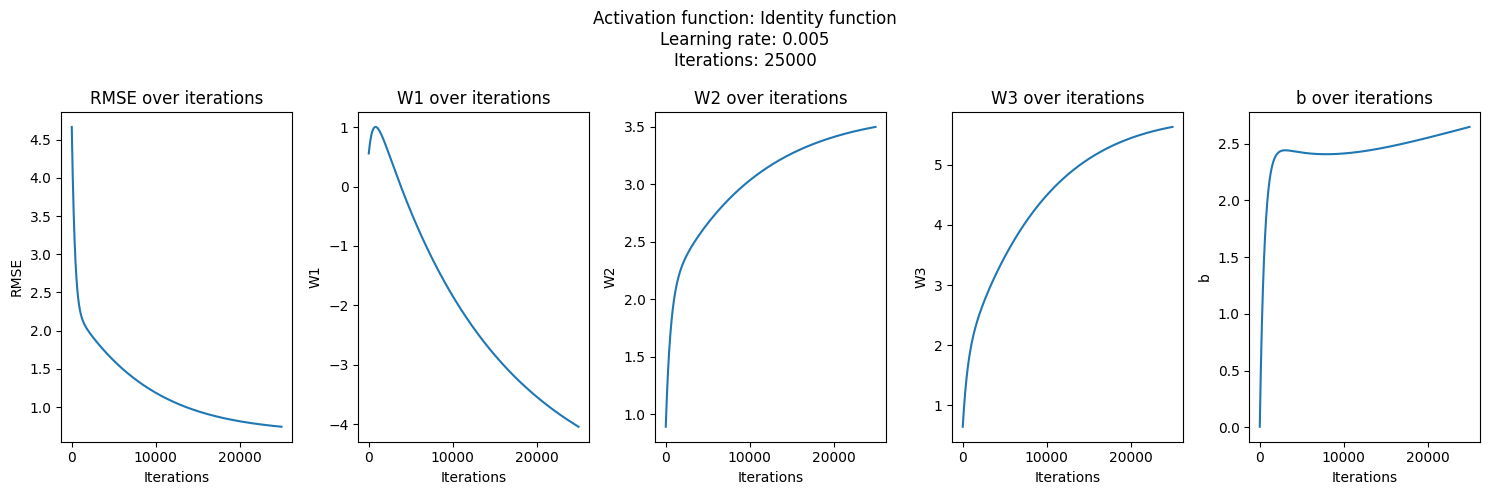

In [ ]:
# plot template
fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # Create 5 subplots on one line

# plot RMSE
axs[0].plot(range(iterations), data_storage['RMSE'])
axs[0].set_title('RMSE over iterations')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('RMSE')

# plot w1
axs[1].plot(range(iterations), data_storage['w1'])
axs[1].set_title('W1 over iterations')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('W1')

# plot w2
axs[2].plot(range(iterations), data_storage['w2'])
axs[2].set_title('W2 over iterations')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('W2')

# plot w2
axs[3].plot(range(iterations), data_storage['w3'])
axs[3].set_title('W3 over iterations')
axs[3].set_xlabel('Iterations')
axs[3].set_ylabel('W3')

# plot b
axs[4].plot(range(iterations), data_storage['b'])
axs[4].set_title('b over iterations')
axs[4].set_xlabel('Iterations')
axs[4].set_ylabel('b')

# Set a common title for all subplots
fig.suptitle(f"Activation function: Identity function\nLearning rate: {lr}\nIterations: {iterations}")
plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

# Other Activation Functions

## Sigmoid

In [13]:
# sigmoid activation function (non-linear)
def sigmoid_activ_func(x):
    for i in range(len(x)):
      x[i] = 1 / (1 + np.exp(-x[i]))
    return x

# derivative of sigmoid activation function
def d_sigmoid_activ_func(x):
    x = sigmoid_activ_func(x)
    x = x * (1 - x)
    return x

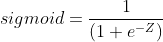

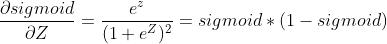

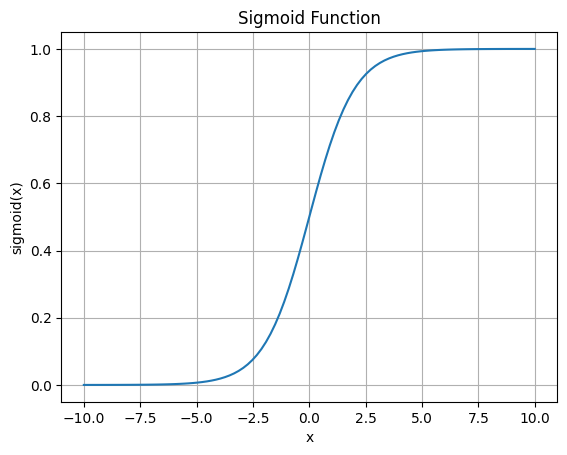

In [20]:
# simple igmoid function for visual
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# generate data for visual
x_sig = np.linspace(-10, 10, 100)
y_sig = sigmoid(x_sig)

# plot
plt.plot(x_sig, y_sig)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

## derivitive  math [link text](https://mathworld.wolfram.com/SigmoidFunction.html)

## ReLu

In [14]:
# ReLu activation function (non-linear)
def relu_activ_func(x):
    for i in range(len(x)):
        x[i] = max(0, x[i]) # ReLu
    return x

# Derivative of ReLu activation function
def d_relu_activ_func(x):
    for i in range(len(x)):
        if x[i] > 0:
            x[i] = 1
        else:
            x[i] = 0
    return x

relu.png

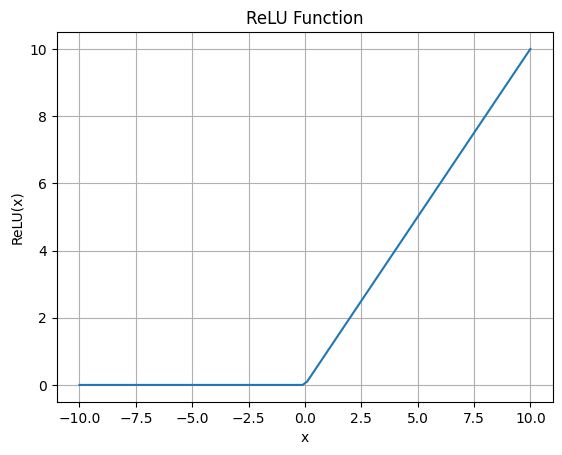

In [22]:
# simple relu function for visual
def relu(x):
    return np.maximum(0, x)

# generate data for visual
x = np.linspace(-10, 10, 100)
y = relu(x)

# plot
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

# Other Scaling

## Standardization

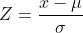

In [ ]:
# Calculate mean and standard deviation
mean_x1 = np.mean(x1)
std_x1 = np.std(x1)

mean_x2 = np.mean(x2)
std_x2 = np.std(x2)

# Standardize the vectors
#x1 = (x1 - mean_x1) / std_x1
#x2 = (x2 - mean_x2) / std_x2